<a href="https://colab.research.google.com/github/voke-brume/AI-ML/blob/main/AI/ComputerVision/CS678_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Image Filtering: Convolution with filters, **

### Task 1: Convolution with filters

A Gaussian filter has filter values that follow the Gaussian probability distribution. Specifically, the
values of the filter are

\begin{align}
\text{1D kernel : } G(x) = \frac{1}{\sqrt{2\pi σ^2}} \exp \left(- \frac{x^2} {2σ^2} \right) \\
\text{2D kernel : } G(x, y) = \frac{1}{2\pi σ^2} \exp \left(- \frac{x^2 + y^2} {2σ^2} \right)
\end{align}
where 0 is the center of the filter (in both 1D and 2D) and $σ$ is a free parameter that controls how much
blurring takes place. One thing that makes lots of operations fast is that applying a 2D Gaussian filter to
an image can be done by applying two 1D Gaussian filters, one vertical and the other horizontal.

<font color='red'>[CODE]</font> **Task 1(a): Complete the function** `convolve()`. Be sure to implement convolution and not cross-correlation/filtering (i.e., flip the kernel as soon as you get it). For consistency purposes, please use zero-padding when implementing convolution. **(10 points)**

**Note: you cannot use any libraries that implement this function. However you can use them to compare your results.**

In [ ]:
# TODO: Complete the function
def convolve(image, kernel):
  """
  Return the convolution result: image * kernel.
  Reminder to implement convolution and not cross-correlation!
  Caution: Please use zero-padding.

  Input- image: H x W
          kernel: h x w
  Output- convolve: H x W
  """
  # Reshape image if image is not 2D
  if len(image.shape) > 2: image = reshape_image(image)

  # Pad image by appropriate pixels
  padded_image = zero_padding(image, get_padding_on_sides(kernel.shape[0]))

  # Flip kernel for convolution
  if kernel.shape[0] == 1: flipped_kernel = np.fliplr( kernel )
  elif kernel.shape[1] == 1: flipped_kernel = np.flipud( kernel )
  else: flipped_kernel = np.flipud(np.fliplr(kernel))

  # Create output with same size as image but filled with zeros
  output = np.zeros(shape = image.shape)

  # Save kernel size
  k = max( flipped_kernel.shape[0], flipped_kernel.shape[1] )

  # Iterate over the rows
  for i in range(image.shape[0]):
      # Iterate over the columns
      for j in range(image.shape[1]):
          # Get the current matrix
          matrix = padded_image[i:i+k, j:j+k]
          # Apply convolution using element-wise multiplication and summation
          output[i, j] = np.sum( np.multiply(matrix, flipped_kernel) )

  return output

In [ ]:
# Gaussian Filter Implementation
def gaussian_kernel(size: int, sigma: float, sum_of_one = False) -> np.array:
  """
  This function creates a gaussian filter of specified size and
  standard deviation (sigma).

  Input - size(int)
          sigma (float)
          sum_of_one (boolean): determines if the sum of kernel values is one or not
  """
  ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
  xx, yy = np.meshgrid(ax, ax)

  kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))

  # Return sum of one
  if sum_of_one == True:  return kernel / np.sum(kernel)

  # Return values that do not sum up to one
  return kernel

In [ ]:
# Create 3x3 Gaussian kernel with specified sigma
g_kernel = gaussian_kernel(3, 0.572, sum_of_one = True)
g_kernel

array([[0.02288857, 0.10551256, 0.02288857],
       [0.10551256, 0.48639548, 0.10551256],
       [0.02288857, 0.10551256, 0.02288857]])

In [ ]:
# Applying Gaussian filter on grace_hopper image
gaussian_convolved_image = convolve(original_image, g_kernel)

# Save image to task folder
save_image_to_drive(gaussian_convolved_image, 'gaussian_sum_to_one.png')

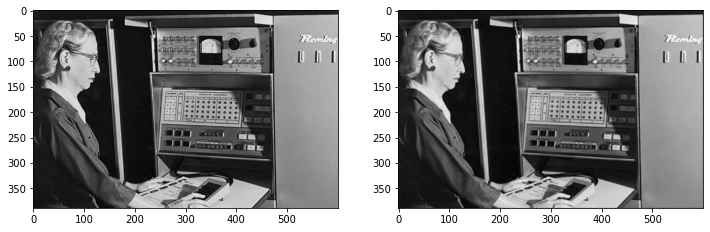

In [ ]:
# Compare original image against Gaussian filter image
plot_two_images( original_image, gaussian_convolved_image)

<font color='blue'>[ANSWER]</font> **Task 1(c): Discuss** why it is a good idea for you to use a smoothing filter to sum up to 1. **(3 points)**

*(Hints: You may experiment with your implementation. As an experiment to help deduce why, observe that if you sum all the values with of the
Gaussian filter in (b), you should get a sum close to 1. If you are very particular about this, you can make it exactly sum to 1 by dividing all filter values by their sum. When this filter is applied to ’grace hopper.png’, what are the output intensities (min, max, range)? Now consider a Gaussian filter of size 3 × 3 and standard deviation σ = 2 (but do not force it to sum to 1 – just use the values). Calculate the sum of all filter values in this case. What happens to the output image intensities in this case?)*

In [ ]:
# Create 3x3 Gaussian kernel with specified sigma and does not sum up to one
g_kernel_2 = gaussian_kernel(3, 2)
g_kernel_2

array([[0.77880078, 0.8824969 , 0.77880078],
       [0.8824969 , 1.        , 0.8824969 ],
       [0.77880078, 0.8824969 , 0.77880078]])

In [ ]:
# Applying Gaussian filter on grace_hopper image
gaussian_convolved_image_2 = convolve(original_image, g_kernel_2)

# Save image to task folder
save_image_to_drive(gaussian_convolved_image_2, 'gaussian_not_sum_to_one.png')

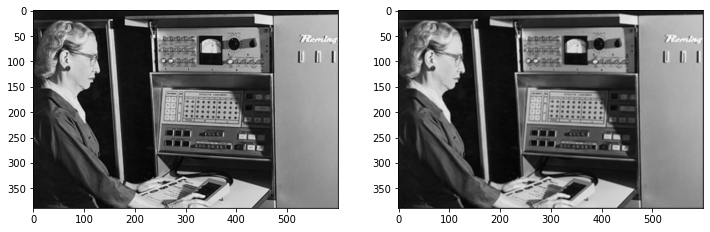

In [ ]:
# Compare original image against Gaussian Blur
plot_two_images( gaussian_convolved_image, gaussian_convolved_image_2)

In [ ]:
# Compare statistics of both output intensities
print('Stats of Gaussian that sums up to one: \nMin = {0}, \nMax= {1}, \nMean = {2}'.format( np.min(gaussian_convolved_image), np.max(gaussian_convolved_image), np.mean(gaussian_convolved_image) ) )

Stats of Gaussian that sums up to one: 
Min = 3.0590279315004754, 
Max= 248.3285872713745, 
Mean = 95.44703253197973


In [ ]:
# Compare statistics of both output intensities
print('Stats of Gaussian that does not sum up to one: \nMin = {0}, \nMax= {1}, \nMean = {2}'.format( np.min(gaussian_convolved_image_2), np.max(gaussian_convolved_image_2), np.mean(gaussian_convolved_image_2) ) )

Stats of Gaussian that does not sum up to one: 
Min = 30.686759055138978, 
Max= 1884.1017932426228, 
Mean = 728.7836978525459


*Start Discussion here*

This has to do with the relationship between sigma and support. When the sigma is just big enough (0.572) for the support (3x3), the gaussian is well defined within the support. Increasing the sigma for the same support means the support will not model the Gaussian completely. 

Also, this explains why the range and mean of the pixel output intensities when the smoothing filter sums up to one(1) is 3 - 249 which is within the range of 0-255 for representing black and white colors. On the other hand, pixel internsity values when the filter does not sum up to one(1) ranges from 30 - 1885.

Consider the image as a function $I(x, y)$ and $I : R^2 → R$. When working on edge detection, we often
pay a lot of attention to the derivatives. Denote the “derivatives”:

\begin{align}
I_x(x,y) = I(x+1,y) - I(x-1,y) ≈ 2 \frac{\partial I}{\partial x} (x,y) \\
I_y(x,y) = I(x,y+1) - I(x,y-1) ≈ 2 \frac{\partial I}{\partial y} (x,y)
\end{align}

where $I_x$ is the twice the derivative and thus off by a factor of 2. This scaling factor is not a concern since the units of the image are made up and anyway scale the derivative and so long as you are consistent, things are fine.

<font color='blue'>[ANSWER]</font> **Task 1(d): Derive** the colvolution kernels for derivatives:

(1) $k_x \in R^{1 \times 3} : I_x = I * k_x$ \\
(2) $k_y \in R^{3 \times 1} : I_y = I * k_y$ 

**(4 points)**

*Start Derivation here*

1. \begin{align}
        I(x, y) = \frac{I(x + h, y) - f(x - h, y)}{2h} =  \left\{
        \begin{array}{cl}
        -1 & 0 & 1
        \end{array}
        \right\} 
    \end{align}

2. \begin{align}
        I(x, y) = \frac{I(x, y + h) - f(x, y - h)}{2h} =  \left\{
        \begin{array}{cl}
        -1 & 0 & 1
        \end{array}
        \right\}^T =
        \left\{
        \begin{array}{cl}
        -1 \\
         0 \\
         1
        \end{array}
        \right\}  
    \end{align}

<font color='red'>[CODE]</font> **Task 1(e): Complete the function** `edge_detection()` below whose output is gradient magnitude. **(5 points)**

In [ ]:
# TODO: Complete the function
def edge_detection(image):
    """
    Return Ix, Iy and the gradient magnitude of the input image

    Input- image: H x W
    Output- Ix, Iy, grad_magnitude: H x W
    """
    
    # TODO: Fix kx, ky
    kx = np.array([ [-1, 0, 1] ])  # 1 x 3
    ky = np.array([ [1], [0], [-1] ])  # 3 x 1

    #  Convolve image and derivative filters
    Ix = convolve(image, kx)
    Iy = convolve(image, ky)

    # TODO: Use Ix, Iy to calculate grad_magnitude: (Ix^2 + Iy^2)^1/2
    grad_magnitude = np.sqrt( np.square(Ix) + np.square(Iy) )

    return Ix, Iy, grad_magnitude

<font color='green'>[DATA]</font> <font color='blue'>[ANSWER]</font> **Task 1(f):** Use original `grace_hopper.png` image and the gaussian convolution version as inputs respectively and use `edge_detection()`. Save both version and include it in your submission. **Discuss** the difference between the two images in no more than three sentences. **(4 points)**

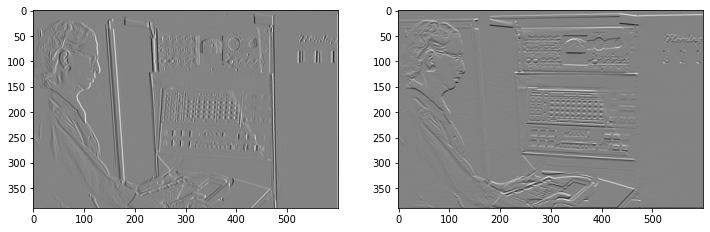

In [ ]:
# Edge Detection on original grace_hopper.png image
grace_vertical_edge, grace_horizontal_edge, grace_magnitude = edge_detection(original_image)

# Save results
save_image_to_drive(grace_vertical_edge, 'grace_vertical_edge.png')
save_image_to_drive(grace_horizontal_edge, 'grace_horizontal_edge.png')

# Plot vertical and horizontal derivatives for comparison
plot_two_images(grace_vertical_edge, grace_horizontal_edge)

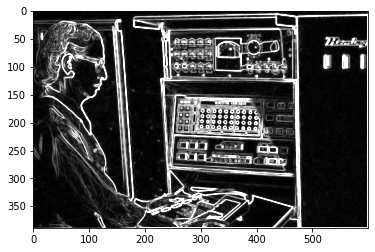

In [ ]:
# Save magnitude of original grace_hopper.png image
save_image_to_drive(grace_magnitude, 'grace_magnitude.png')

# Plot magnitude
plot_image(grace_magnitude)

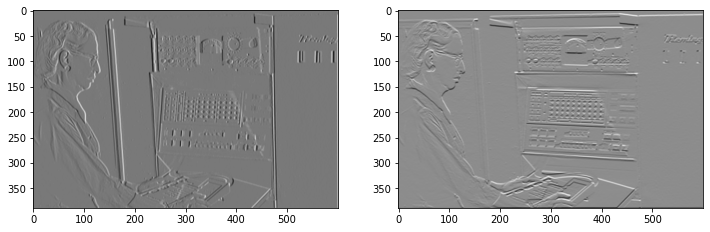

In [ ]:
# Edge Detection on Gaussian convolution version
gaussian_vertical_edge, gaussian_horizontal_edge, gaussian_magnitude = edge_detection(gaussian_convolved_image)

# Save results
save_image_to_drive(gaussian_vertical_edge, 'gaussian_vertical_edge.png')
save_image_to_drive(gaussian_horizontal_edge, 'gaussian_horizontal_edge.png')

# Plot vertical and horizontal derivatives for comparison
plot_two_images(gaussian_vertical_edge, gaussian_horizontal_edge)

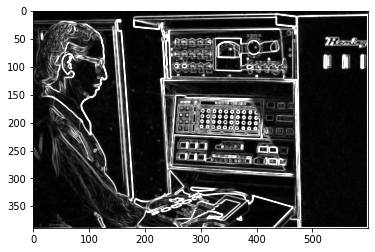

In [ ]:
# Save magnitude of original grace_hopper.png image
save_image_to_drive(gaussian_magnitude, 'gaussian_magnitude.png')

# Plot magnitude
plot_image(gaussian_magnitude)

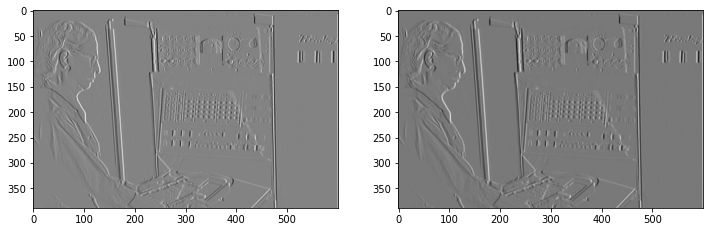

In [ ]:
# Compare vertical edge detection results from original image against gaussian image
plot_two_images(grace_vertical_edge, gaussian_vertical_edge)

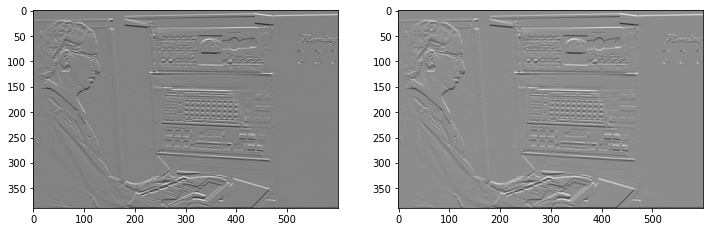

In [ ]:
# Compare horizontal edge detection results from original image against gaussian image
plot_two_images(grace_horizontal_edge, gaussian_horizontal_edge)

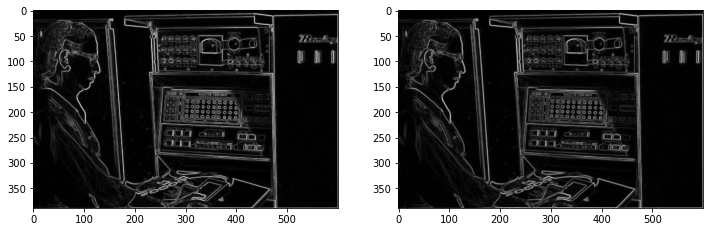

In [ ]:
# Compare magnitude edge detection results from original image against gaussian image
plot_two_images(grace_magnitude, gaussian_magnitude)

*Start your Discussion here*

The three comparisons of the edge detection results on the original image against gaussian smoothened image in the above plots show edge are alittle well defined in the gaussian smoothened image. This is because applying gaussian filter on an image before edge detection helps to remove noise, thereby aiding the algorithm detect edge lines mor accurately.

## Part 2: Corners

This question looks long, but that is only because there is a fairly large amount of walk-through and formalizing stuff. The resulting solution, if done properly, is certainly under 10 lines. If you use filtering, please use `scipy.ndimage.convolve()` to perform convolution whenever you want to use it. Please use **zero padding** for consistency purposes `(Set mode=‘constant’)`.


Foreword: While edges can be useful, corners are often more informative features as they are less common. In this section, we implement a Harris Corner Detector (see: https://en.wikipedia.org/wiki/Harris Corner Detector) to detect corners. Corners are defined as locations $(x, y)$ in the image where a small change any direction results in a large change in intensity if one considers a small window centered on $(x, y)$ (or, intuitively, one can imagine looking at the image through a tiny hole that’s centered at $(x, y)$). This can be contrasted with edges where a large intensity change occurs in only one direction, or flat regions where moving in any direction will result in small or no intensity changes. Hence, the Harris Corner Detector considers small windows (or patches) where a small change in location leads large variation in multiple directions (hence corner detector).


Let’s consider a grayscale image where $I(x, y)$ is the intensity value at image location $(x, y)$. We can calculate the corner score for every pixel $(i, j)$ in the image by comparing a window W centered on $(i, j)$ with that same window centered at $(i + u, j + v)$. To be specific: a window of size $2d + 1$ centered on $(i, j)$ is a the set of pixels between $i − d$ to $i + d$ and $j − d$ to $j + d$. Specifically, we will compute the sum of square differences between the two,


\begin{align}
E(u,v) = \sum_{x,y \in W} [I(x+u,y+v)] - I(x,y)]^2
\end{align}

or, for every pixel $(x, y)$ in the window $W$ centered at $i, j$, how different is it from the same window, shifted over $(u, v)$. This formalizes the intuitions above:

- If moving $(u, v)$ leads to no change for all $(u, v)$, then $(x, y)$ is probably flat.
- If moving (u, v) in one direction leads to a big change and adding $(u, v)$ in another direction leads to a small change in the appearance of the window, then $(x, y)$ is probably on an edge.
- If moving any $(u, v)$ leads to a big change in appearance of the window, then $(x, y)$ is a corner.

You can compute this $E(u, v)$ for all $(u, v)$ and at all $(i, j)$.

**Task 2: Corner Score**

Your first task is to write a function that calculates this function for all pixels $(i, j)$ with a fixed offset $(u, v)$ and window size $W$ . In other words, if we calculate $S = cornerscore(u, v)$, $S$ is an image such that $S_{ij}$ is the sum-of-squared differences between the window centered on $(i, j)$ in $I$ and the window centered on $(i + u, j + v)$ in $I$. The function will need to calculate this function to every location in the image. This is doable via a quadruple for-loop (for every pixel $(i, j)$, for every pixel $(x, y)$ in the window centered at $(i, j)$, compare the two). However, you can also imagine doing this by \\
(a) offsetting the image by $(u, v)$  \\
(b) taking the squared difference with the original image \\
(c) summing up the values within a window using convolution. Note: If you do this by convolution, use zero padding for offset-window values that lie outside of the image.

<font color='red'>[CODE]</font> **Task 2(a): Complete the function** `corner_score()` which takes as input an image, offset values $(u,v)$ and window size $W$. The function computes the response $E(u, v)$ for every pixel. We can look at, for instance the image of $E(0, y)$ to see how moving down $y$ pixels would change things and the image of $E(x, 0)$ to see how moving right $x$ pixels would change things. **(10 points)**

*Hint: You can use `np.roll` for offsetting by $u$ and $v$.*

In [ ]:
# TODO: Complete the function
def corner_score(image, u=5, v=5, window_size=(5, 5)):
  """
  Given an input image, x_offset, y_offset, and window_size,
  return the function E(u,v) for window size W
  corner detector score for that pixel.
  Use zero-padding to handle window values outside of the image.

  Input- image: H x W
          u: a scalar for x offset
          v: a scalar for y offset
          window_size: a tuple for window size

  Output- results: a image of size H x W
  """
  # Save window size
  wind_size = window_size[0]

  # Reshape image if image is not 2D
  if len(image.shape) > 2: image = reshape_image(image)

  # Save image shape
  image_shape = image.shape

  # Pad image by appropriate pixels
  padded_image = zero_padding(image, get_padding_on_sides(wind_size) +  wind_size)
  #padded_image = padded_image[wind_size:, wind_size:]

  # Create output with same size as image but filled with zeros
  output = np.zeros(shape = image_shape)

   # Iterate over the rows
  for i in range(image_shape[0]):
      # Iterate over the columns
      for j in range(image_shape[1]):
        # img[i, j] = individual pixel value
          # Get the current matrix
          current_matrix = padded_image[i+wind_size: i+ (wind_size*2), j+wind_size:j+ (wind_size*2)]
          rolled_matrix = np.roll(np.roll(padded_image, padded_image.shape[1] - u, axis=1), padded_image.shape[0] - v, axis=0)[i+wind_size: i+ (wind_size*2), j+wind_size:j+ (wind_size*2)]

          # Calculate for E(u,v) for each pixel
          output[i, j] = np.sum( np.square(rolled_matrix - current_matrix) )

  # output = None
  return output

<font color='green'>[DATA]</font> **Task 2(b) Save results** for `grace_hopper.png` for $(u, v) = \{ (0,5), (0,-5), (5,0), (-5,0) \}$ and window size $(5,5)$ **(3 points)**

In [ ]:
u0v5 = corner_score(original_image, u=0, v=5)
u0v_5 = corner_score(original_image, u=0, v=-5)
u5v0 = corner_score(original_image, u=5, v=0)
u_5v0 = corner_score(original_image, u=-5, v=0)

In [ ]:
# Save results
save_image_to_drive(u0v5, 'u0v5.png')
save_image_to_drive(u0v_5, 'u0v_5.png')
save_image_to_drive(u5v0, 'u5v0.png')
save_image_to_drive(u_5v0, 'u_5v0.png')

float64


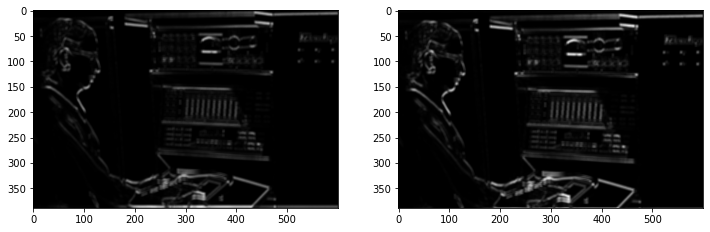

In [ ]:
# Compare results for similar axis
plot_two_images(u0v5, u0v_5)
print(u_5v0.dtype)

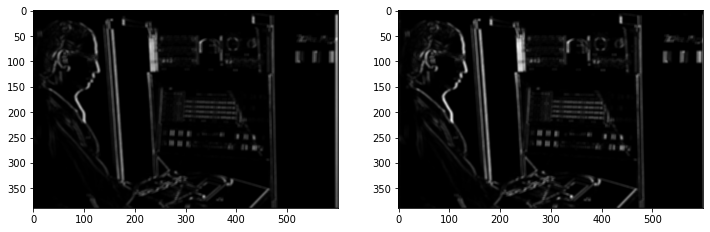

In [ ]:
plot_two_images(u5v0, u_5v0)

<font color='blue'>[ANSWER]</font> **Task 2(c)** Early work by Moravec [1980] used this function to find corners by computing $E(u, v)$ for a range of offsets and then selecting the pixels where the corner score is high for all offsets. Discuss below in few sentences why checking all the us and vs might be impractical in a few sentences. **(3 points)**

*Start your discussion here*

It is impractical to check for all u's and v's because the computational resource needed for the technique is a lot and increases with increasing image size. For example, the Grace Hopper image contains 389 x 600 = 233,400 pixels and there are 8 possible u's and v's for each pixel. This means we will have to compute the function 1,867,200 times. Bigger images will need even more computational resources, making technique impractical.

### Task 3: Harris Corner Detector

For every single pixel $(i, j)$, you now have a way of computing how much changing by $(u, v)$ changes the appearance of a window (i.e., $E(u, v)$ at $(i, j)$). But in the end, we really want a single number of “cornerness” per pixel and don’t want to handle checking all the $(u, v)$ values at every single pixel $(i, j)$. You’ll implement the cornerness score invented by Harris and Stephens [1988].

Harris and Stephens recognized that if you do a Taylor series of the image, you can build an approximation of $E(u, v)$ at a pixel $(i, j)$. Specifically, if $I_x$ and $I_y$ denote the image of the partial derivatives of $I$ with respect to $x$ and $y$ (computable via $k_x$ and $k_y$ from above), then

\begin{align}
E(u,v) \approx \sum_{W} (I^2_x u^2 + 2I_xI_yuv + I^2_yv^2) = [u,v]
\begin{bmatrix}
\sum_w I_x^2 & \sum_w I_xI_y\\
\sum_W I_xI_y & \sum_W I_y^2\\
\end{bmatrix} [u, v]^T = [u, v] M [u, v]^T
\end{align}

This matrix $M$ has all the information needed to approximate how rapidly the image content changes within a window near each pixel and you can compute M at every single pixel $(i, j)$ in the image. To avoid extreme notation clutter, we assume we are always talking about some fixed pixel $i, j$, the sums are over $x, y$ in a $2d + 1$ window $W$ centered at $i, j$ and any image (e.g., $I_x$ ) is assumed to be indexed by $x, y$. But in the interest of making this explicit, we want to compute the matrix $M$ at $i, j$. The top-left and bottom-right elements of the matrix $M$ for pixel $i, j$ are:

\begin{align}
M[0,0] = \sum_{i-d \le x \le i+d \\ i-d \le y \le i+d} I_x(x,y)^2\\ 
M[1, 1] = \sum_{i-d \le x \le i+d \\ i-d \le y \le i+d} I_y(x,y)^2\\ 
\end{align}

If you look carefully, you may be able to see that you can do this by convolution – with a filter that sums things up.

What does this do for our lives? We can decompose the $M$ we compute at each pixel into a rotation matrix $R$ and diagonal matrix $diag([λ_1 , λ_2 ])$ such that (specifically an eigen-decomposition):

\begin{align}
M = R^{-1} diag([\lambda_1, \lambda_2])R
\end{align}

where the columns of $R$ tell us the directions that $E(u, v)$ most and least rapidly changes, and $λ_1 , λ_2$ tell us the maximum and minimum amount it changes. In other words, if both $λ_1 and λ_2$ are big, then we have a corner; if only one is big, then we have an edge; if neither are big, then we are on a flat part of the image. Unfortunately, finding eigenvectors can be slow, and Harris and Stephens were doing this over 30 years ago. Harris and Stephens had two other tricks up their sleeve. First, rather than calculate the eigenvalues directly, for a 2x2 matrix, one can compute the following score, which is a reasonable measure of what the eigenvalues are like:

\begin{align}
R= \lambda_1\lambda_2 - \alpha(\lambda_1 - \lambda_2)^2 = det(M) - αtrace(M)^2
\end{align}

which is far easier since the determinants and traces of a 2x2 matrix can be calculated very easily (look this up online). Pixels with large positive $R$ are corners; pixels with large negative $R$ are edges; and pixels with low $R$
are flat. In practice $α$ is set to something between $0.04$ and $0.06$. Second, the sum that’s being done weights pixels across the window equally, when we know this can cause trouble. So instead, Harris and Stephens computed a $M$ where the contributions of $I_x$ and $I_y$ for each pixel $(i, j)$ were weighted by a Gaussian kernel.

**Haris Corner Implementation Pipeline**

(*Note: you can design your own implementation as long as it does not uses external libraries or function which direclty implements Harris Corner detection.*)

1. In your implementation, you should first figure out how to calculate M for all pixels just using a straight-forward sum. You can compute it by brute force (quadruple for-loop) or convolution (just summing over a window). In general, it’s usually far easier to write a slow-and-not-particularly-clever version that does it brute force. This is often a handful of lines and requires not so much thinking. You then write a version that is convolutional and faster but requires some thought. This way, if you have a bug, you can compare with the brute-force version that you are pretty sure has no issues. You can store $M$ as a 3-channel image where, for each pixel $(i, j)$ you store $M_{1,1}$ in the first channel, $M_{1,2}$ in the second and $M_{2,2}$ in the third. Storing $M_{2,1}$ is unnecessary since it is the same as $M_{1,2}$.

2. You should then figure out how to convert $M$ at every pixel into $R$ at every pixel. This requires of operations (det, trace) that have closed form expressions for 2x2 matrices that you can (and should!) look up. Additionally, these are expressions that you can do via element-wise operations (+, * ) on
the image representing the elements of $M$ per pixel.

3. Finally, you should switch out summing over the window (by convolution or brute force) to summing over the window with a Gaussian weight and by convolution. The resulting operation will be around five cryptic lines that look like magic but which are doing something sensible under the hood.

<font color='red'>[CODE]</font> **Task 3(a) Implement** `harris_detector()` function. **(15 points)**

**Note:** You cannot call a library function that has already implemented the Harris Corner Detector to solve the task. You can, however, look at where Harris corners are to get a sense of whether your implementation is doing well.



In [ ]:
# TODO: Complete the function
def harris_detector(image, window_size=(5, 5)):
    """
    Given an input image, calculate the Harris Detector score for all pixels
    You can use same-padding for intensity (or 0-padding for derivatives)
    to handle window values outside of the image.

    Input- image: H x W
    Output- results: a image of size H x W
    """

    # Change image to grayscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # compute the derivatives
    Ix, Iy, mag = edge_detection(image)

    # Gaussian kernel
    gauss_kernel = gaussian_kernel(window_size[0], 1, sum_of_one = True)

    Ixx = ndimage.convolve(np.square(Ix), gauss_kernel, mode='constant', cval=0.0)
    Iyy = ndimage.convolve(np.square(Iy), gauss_kernel, mode='constant', cval=0.0)
    Ixy = ndimage.convolve(Ix * Iy, gauss_kernel, mode='constant', cval=0.0)

    # For each image location, construct the structure tensor and calculate
    # the Harris response
    sensitivity_factor = 0.05

    # Parameters to computer Harri response
    detA = Ixx * Iyy - np.square(Ixy)
    traceA = Ixx +  Iyy
    
    # Response scores for harri detector
    response = detA - sensitivity_factor * np.square(traceA)

    # Normalizing the values
    response_range = response.max() - response.min()
    response = (response / response_range) * 255

    return response

<font color='green'>[DATA]</font> **Task 3(b)** Generate a Harris Corner Detector score for every point in a grayscale version of ’grace hopper.png’, and save these scores as a heatmap image and include in your submission. *(Use matplotlib to visualize and save the heatmap.)* **(3 points)**

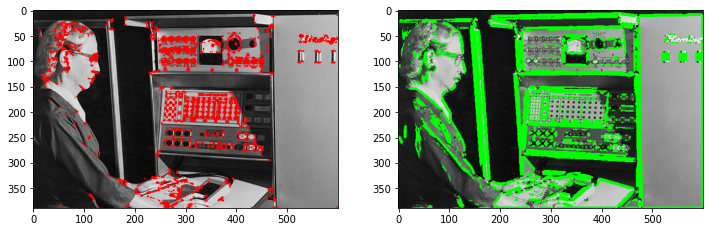

In [ ]:
# Harris corner detector score for Grace Hopper
harris_response = harris_detector(original_image)

# Duplicate image for corners and edges
corners = np.copy(original_image)
edges = np.copy(original_image)

# Save max and min values
h_max = harris_response.max()
h_min = harris_response.min()

# Save threshold fo values
threshold_corner = 0.001
threshold_edge = 0.0001

# Loop through response scores and color values above threshold
for y, row in enumerate(harris_response):
  for x, pixel in enumerate(row):
    if pixel >= h_max * threshold_corner:
      corners[y, x] = [255, 0, 0]
    elif pixel <= h_min * threshold_edge:
      edges[y, x] = [0, 255, 0]

# Plot Corners and Edges
plot_two_images(corners, edges)

# Save results fjor edges and corners
save_image_to_drive(corners, 'corners.png')
save_image_to_drive(edges, 'edges.png')

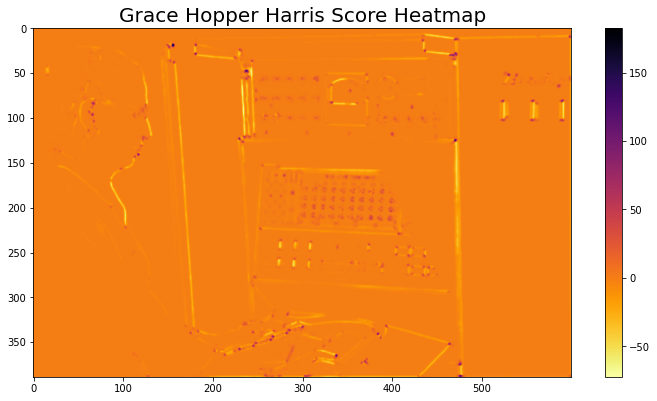

In [ ]:
# Plot heatmap Harris Corner Detector scores of Grace Hopper image
fig, ax = plt.subplots( figsize=(10,10))
im = ax.imshow(harris_response, cmap="inferno_r")
cbar = ax.figure.colorbar(im, ax=ax, shrink=0.5 )
ax.set_title("Grace Hopper Harris Score Heatmap", size=20)
fig.tight_layout()
plt.savefig("/content/drive/Othercomputers/myPCWindows/schoolStuff [D]/CS678/assignment2/assignment2/grace_harris_heatmap.png", format='png',dpi=150)

## Part 3: RANSAC and Fitting Models

**NOTE: In this part you don't have to submit any code but you might have to code in order to get to the results.**

*(Please refer to class notes for Overview on Homography. Also you are free to lookup online.)*

### Task 4: RANSAC Theory

In this section, suppose we are fitting a 3D plane (i.e., $ax + by + cz + d = 0$). A 3D plane can be defined by 3 points in general position (2 give a line). Plane fitting happens when people analyze point clouds to reconstruct scenes from laser scans. Each question depends on on the previous one. If you are not sure about one previous answer, give an equation in terms of a set of variables. In keeping with other notation that you may find elsewhere, we will refer to the model that is fit in the inner loop of RANSAC as the putative model.

<font color='blue'>[ANSWER]</font> **Task 4(a)** The minimum number of 3D points needed to sample in an iteration to compute a putative model. **(3 points)**

*Ans*

Three (3) : Minimum number of points needed to form a 3D plane

<font color='blue'>[ANSWER]</font> **Task 4(b)** Determine the probability that the data picked for to fit the putative model in a single iteration fails, assuming that the outlier ratio in the dataset is 0.2 and we are fitting 3D planes. **(3 points)**

*Ans*

Data fails if it contains an outlier.

Probability that N samples where contaminated: bold text$(1 - (1 - e)^{s})^{N}$

Answer: 0.49

<font color='blue'>[ANSWER]</font> **Task 4(c)** Determine the minimum number of RANSAC trials needed to have $≥ 95%$ chance of success, assuming that the outlier ratio in the dataset is 0.2 and we are fitting planes. **(3 points)**

*(Hint: You can do this by explicit calculation or by search/trial and error with numpy.)*

*Ans*

Five (5)

### Task 5: Fitting Linear Transforms

Suppose we have a set of 2D correspondences $([x^{'}_i , y_i^{'} ] ↔ [x_i , y_i ])$ for $1 ≤ i ≤ N$ .

<font color='blue'>[ANSWER]</font> **Task 5(a):** Suppose we are fitting a linear transformation, which can be parameterized by a matrix $M \in R^{2 \times 2}$ (i.e. $[x^{'}, y^{'}]^T = M[x,y]^T$)

Answer the number of degrees of freedom $M$ has and the minimum number of 2D
correspondences that are required to fully constrain or estimate $M$. **(3 points)**

*Ans*

\begin{align}
        \text{M} = \left\{
        \begin{array}{cl}
        s_x & 0 \\
        0 & s_y 
        \end{array}
        \right\}   (Scale)
    \end{align}

\begin{align}
        \text{M} = \left\{
        \begin{array}{cl}
        -1 & 0 \\
        0 & 1 
        \end{array}
        \right\}   (Mirror)
    \end{align}

\begin{align}
        \text{M} = \left\{
        \begin{array}{cl}
        1 & sh_x \\
        sh_y & 1 
        \end{array}
        \right\}   (Shear)
    \end{align}

\begin{align}
        \text{M} = \left\{
        \begin{array}{cl}
        cos(Θ)- & sin(Θ) \\ 
        sin(Θ) & cos(Θ) 
        \end{array}
        \right\}   (Rotation)
    \end{align}

As can be observed from the above properties of 2D linear transformation, 

**Number of degrees of freedom: Two (2)**

Number of minimum correspondense:

\begin{align}
        \text{M} = \left\{
        \begin{array}{cl}
        cos(Θ)- & sin(Θ) \\ 
        sin(Θ) & cos(Θ) 
        \end{array}
        \right\}   (Rotation)
    \end{align}

=> $[x^{'}, y^{'}]^T = M[x,y]^T$

=> \begin{align}
        \left\{...
        \begin{array}{cl}
        x'_i \\
        y'_i
        \end{array}
        ...\right\}^T
        =
        \left\{
        \begin{array}{cl}
        x_i & y_i & 0 & 0 \\
        0 & 0 & x_i & y_i
        \end{array}
        \right\}^T
        \left\{
        \begin{array}{cl}
        m_1\\
        m_2\\
        m_3\\
        m_4
        \end{array}
        \right\} 
    \end{align}

Number of unknowns is 4, therefore;


**Number of 2D correspondence: Two (2)**

<font color='blue'>[ANSWER]</font> **Task 5(b):** Suppose we want to fit $[x_i^{'}, y_i^{'}]^T = M[x_i, y_i]^T$. We would like you formulate the fitting problem in the form 

\begin{align}
argmin_{m \in R^4} || Am-b ||_2^2
\end{align}

where $m ∈ R^4$ contains all the parameters of $M$, $A$ depends on the points $[x_i , y_i ]$ and $b$ depends on the points $[x_i^{'} , y_i^{'} ]$.

Write below the form of $A$, $m$, and $b$ **(3 points)**

*Ans*

The form will be as follows:

\begin{align}
        \text{A} = \left\{
        \begin{array}{cl}
        x_i & y_i & 0 & 0 \\
        0 & 0 & x_i & y_i
        \end{array}
        \right\}^T   
    \end{align}

\begin{align}
        \text{m} = \left\{
        \begin{array}{cl}
        m_1\\
        m_2\\
        m_3\\
        m_4
        \end{array}
        \right\}   
    \end{align}

\begin{align}
        \text{b} = \left\{...
        \begin{array}{cl}
        x'_i \\
        y'_i
        \end{array}
        ...\right\}^T   
    \end{align}


Therefore,

\begin{align}
        \left\{...
        \begin{array}{cl}
        x'_i \\
        y'_i
        \end{array}
        ...\right\}^T
        =
        \left\{
        \begin{array}{cl}
        x_i & y_i & 0 & 0 \\
        0 & 0 & x_i & y_i
        \end{array}
        \right\}^T
        \left\{
        \begin{array}{cl}
        m_1\\
        m_2\\
        m_3\\
        m_4
        \end{array}
        \right\} 
    \end{align}

becomes,

\begin{align}
        \left\{
        \begin{array}{cl}
        0^T & - & y'_1p^T_1 \\
        p^T_1 &  & x'_1p^T_1 \\
          &... \\
        0^T & - & y'_1p^T_1 \\
        p^T_n &  & x'_np^T_n
        \end{array}
        \right\}^T
        \left\{
        \begin{array}{cl}
        m_1\\
        m_2\\
        \end{array}
        \right\} 
    \end{align}


### Task 6: Fitting Affine Transforms

Suppose we have a set of 2D correspondences $[x_i^{'} , y_i^{'}] ↔ [x_i , y_i]$ for $1 ≤ i ≤ N$.

Files: We give an actual set of points in `task6/points case 1.npy` and `task6/points_case_2.npy`: each row of the matrix contains the data $[x_i, y_i, x_i^{'} , y_i^{'}]$ representing the correspondence. You do not need to turn in your code but you may want to write some functions that loads and plots data.

<font color='blue'>[ANSWER]</font> **Task 6(a)** Fit a tranformation of the form

\begin{align}
[x^{'}, y^{'}]^T = S[x,y]^T + t, S \in R^{2 \times 2}, t \in R^{2 \times 1}
\end{align}

by setting up a problem of the form

\begin{align}
argmin_{v \in R^6} || Av-b ||_2^2
\end{align}

and solving it via least squares.

Please provide $(S, t)$ below for file `points_case_1.npy` **(5 points)**

*Helpful Pipepline:*
- Write some code that loads the matrix, shuffles data and calls `np.linalg.lstsq`.

In [ ]:
# Load matrix
case_1 = np.load('/content/drive/Othercomputers/myPCWindows/schoolStuff [D]/CS678/assignment2/assignment2/task6/points_case_1.npy')
case_2 = np.load('/content/drive/Othercomputers/myPCWindows/schoolStuff [D]/CS678/assignment2/assignment2/task6/points_case_2.npy')

In [ ]:
# Function for fitting affine transform using least squared method
def affine_transform_lstsq(file):
  # Seperate the values
  x_y = file[:,0:2]
  x_y_prime = file[:,2:4]
  plt.scatter(x_y[:,0],x_y[:,1],1)
  plt.scatter(x_y_prime[:,0],x_y_prime[:,1],1)
  # Create empty matrix of values
  x_y_prime = [item for sublist in zip(x_y_prime[:,0], x_y_prime[:,1]) for item in sublist]

  z=np.zeros_like(x_y)
  a1 = np.array([item for sublist in zip(x_y[:,0:2],z[:,0:2]) for item in sublist])
  a2 = np.array([item for sublist in zip(z[:,0:2],x_y[:,0:2]) for item in sublist])
  z=z[:,0]
  q=np.ones_like(z)
  a3 = np.array([item for sublist in zip(q,z) for item in sublist])
  a4 = np.array([item for sublist in zip(z,q) for item in sublist])
  A=np.column_stack((a1,a2,a3,a4))

  return np.linalg.lstsq(A, x_y_prime, rcond=None)

[ 1.41444296 -1.41424374 -0.70762108 -0.70690933  0.09998617  0.20014656] [0.23307703]


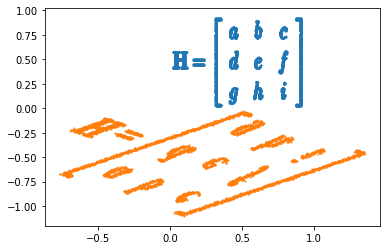

In [ ]:
# Called affine function on point_case_1
LeastSquares, residual, rank, a_sing_values = affine_transform_lstsq(case_1)
print(LeastSquares, residual)

*Ans*

S = [1.41444296, -1.41424374, -0.70762108, -0.70690933]

t = [0.09998617, 0.20014656]


In [ ]:
# point_case_1 kernel
case_1_kernel = np.array([ 
                          [1.41444296, -1.41424374, 0.09998617],
                          [-0.70762108, -0.70690933, 0.20014656],
                          [0, 0, 1]
                          ])

<font color='green'>[DATA]</font> **Task 6(b)** Make as scatterplot of the points $[x_i^{'} , y_i^{'}], [x_i , y_i]$ and $S[x,y]^T + t$ in one figure with different colors. Do this for both `points_case_1.npy` and `point_case_2.npy`. In other words, there should be two plots, each of which contains three sets of N points.

Save the plots and include in your submission. **(3 points)**

*(Hint: Look at `plt.scatter` and `plt.savefig`. For drawing the scatterplot, you can do `plt.scatter(xy[:,0],xy[:,1],1)`. The last argument controls the size of the dot and you may want this to be small so you can set the pattern. You can save the plot using `plt.savefig()` function.)*

[ 0.71259363  0.09778148  0.12136737  1.29186858 -0.39509231 -0.26639818] [78.86494144]


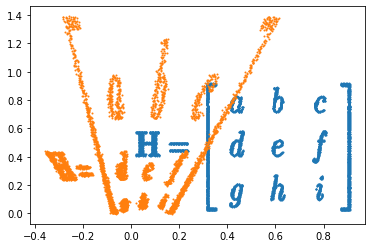

In [ ]:
# Called affine function on point_case_2
LeastSquares_2, residual_2, rank_2, a_sing_values_2 = affine_transform_lstsq(case_2)
print(LeastSquares_2, residual_2)

In [ ]:
# point_case_2 kernel
case_2_kernel = np.array([ 
                          [0.71259363,  0.09778148, -0.39509231],
                          [0.12136737,  1.29186858, -0.26639818],
                          [0, 0, 1]
                          ])

In [ ]:
# Function to transform the (x,y) using (S, t)
def transform_points(file, kernel):
  """ 
  Transform (x,y) to (x',y') using (S, t)

  input: points (nd.array)
         matrix (3 x 3)

  return: warped points
  """

  # Convert points to np.array
  points = np.array(file)

  # Pad the data with ones, so that our transformation can do translations
  pts_pad = np.hstack([points, np.ones((points.shape[0], 1))])
  
  # Compute dot product of kernel and points
  points_warp = np.dot(pts_pad, kernel.T)

  return points_warp[:, :-1]

In [ ]:
# Transform points_case_1 (x,y) using kernel
case_1_transformed = transform_points(case_1[:,0:2], case_1_kernel)

# Transform points_case_2 (x,y) using kernel
case_2_transformed = transform_points(case_2[:,0:2], case_1_kernel)

In [ ]:
# Function to plot the results of affine transform on points file
def plot_affine_results(points,points_transformed):
  plt.scatter(points[:,0],points[:,1],1, color='red')
  plt.scatter(points[:,2],points[:,3],1, color='blue')
  plt.scatter(points_transformed[:,0], points_transformed[:,1],1, color="green")

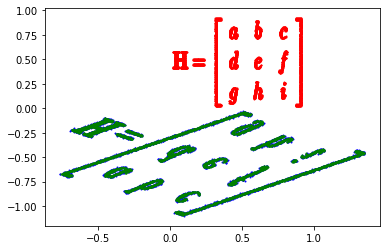

In [ ]:
# Call plot affine function on point_case_1 and its transformed points
plot_affine_results(case_1, case_1_transformed)
plt.savefig("/content/drive/Othercomputers/myPCWindows/schoolStuff [D]/CS678/assignment2/assignment2/point_case_1_transformed.png", format='png',dpi=150)

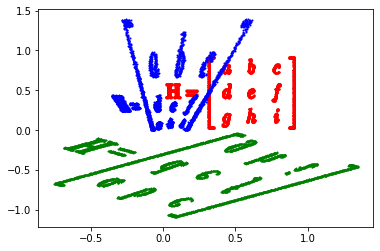

In [ ]:
# Call plot affine function on point_case_2 and its transformed points
plot_affine_results(case_2, case_2_transformed)
plt.savefig("/content/drive/Othercomputers/myPCWindows/schoolStuff [D]/CS678/assignment2/assignment2/point_case_2_transformed.png", format='png',dpi=150)

<font color='blue'>[ANSWER]</font> **Task 6(c)** Please answer the following: how well does an affine transform describe the relationship between $[x, y] ↔ [x^{'} , y^{'}]$ for `points_case_1.npy` and `point_case_2.npy`? You should describe this in two to three sentences. **(4 points)**

*(Hint: what properties are preserved by each transformation?)*



*Ans*

Affine transform helps to better understand the relationship between $[x, y] ↔ [x^{'} , y^{'}]$ in both points files. 

The plot of point_case_1 file shows that the points have been warped but the lines are still preserved which is why affine transform did a pretty good job in transforming $[x, y]$ to $[x^{'} , y^{'}]$ with a very low residual.

On the other hand, Affine transform did a bad job (high residual) on points_case_2 file because the points represent a change in perspective, therefore a perspective transformation is required.